In [1]:
from glob import glob
import os

path = 'raw/'
for file_path in glob(path + '*.zip'):
    filename = file_path.split('/')[-1]
    end_name_ind = filename.find('(')
    os.rename(file_path, path + filename[:end_name_ind]  + '.zip')

In [1]:
# Based on akta_hap.py from Ryan Kibler

#!/home/rdkibler/.conda/envs/pycorn_extractor/bin/python3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pycorn import pc_uni6

In [2]:
'''
This script reads all .zip outputs from AKTA Unicorn software and graphs the normalized UV230 trace from 7-20 mL elution volumes. 

To read the zip file outputs from Unicorn Evaluation, I used the pycorn module @ https://github.com/pyahmed/PyCORN. There is also an online visualization tool at http://pycornweb.appspot.com/.
'''


def get_UV(df, uv, normalize=True,xmin = 0,xmax = 999999):
    uv_code = df.columns[df.columns.str.endswith(f"_{uv}")]
    if len(uv_code) == 0:
        raise ValueError(f"UV {uv} not found!")

    vol_label = f'vol {uv}'
    uv_label = f'uv {uv}'

    df = pd.DataFrame([x[0] for x in df[uv_code].values],columns=[vol_label ,uv_label]).dropna()
    df = df[(df[vol_label] >= xmin) & (df[vol_label] <= xmax)]

    if normalize:
        df[uv_label] = (df[uv_label] - min(df[uv_label])) / (max(df[uv_label]) - min(df[uv_label]))

    return df.reset_index(drop=True)


def parse_file(file):
    #loads the zipped files and parses the xml to collect the data. Returns a pandas dataframe
    fdata = pc_uni6(file)
    fdata.load()
    fdata.xml_parse()
    fdata.clean_up()

    return pd.DataFrame().from_dict({key:fdata[key]['data'] for key in fdata.keys()},orient='index').transpose()

In [6]:
from glob import glob
path = 'raw/'
xmin = 7.0
xmax = 20.0
data = {}
for file_path in glob(path + '*.zip'):
    filename = file_path.split('/')[-1].split('.')[0]
    #grab the entire dataset
    full_df = parse_file(file_path)
    
    df = get_UV(full_df, '230', False, xmin, xmax)

    print(f'Processing {file_path} with UV 230 from {xmin} to {xmax} mL')
    
    #graph data

    #use column name data instead of args.uv because some of the UVs may have failed
    for uv_label in df.columns[df.columns.str.contains("uv")]:

        vol_label = uv_label.replace("uv","vol")
        df_plot = df[[uv_label,vol_label]]
    
    data[filename] = (df_plot, uv_label, vol_label)


Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing raw/DAB14.zi.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing raw/cs_292+DAB37.zi.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing raw/cs_245+DAB31.zi.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing raw/cs_269+DAB33.zi.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing raw/DAB19.zi.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added -

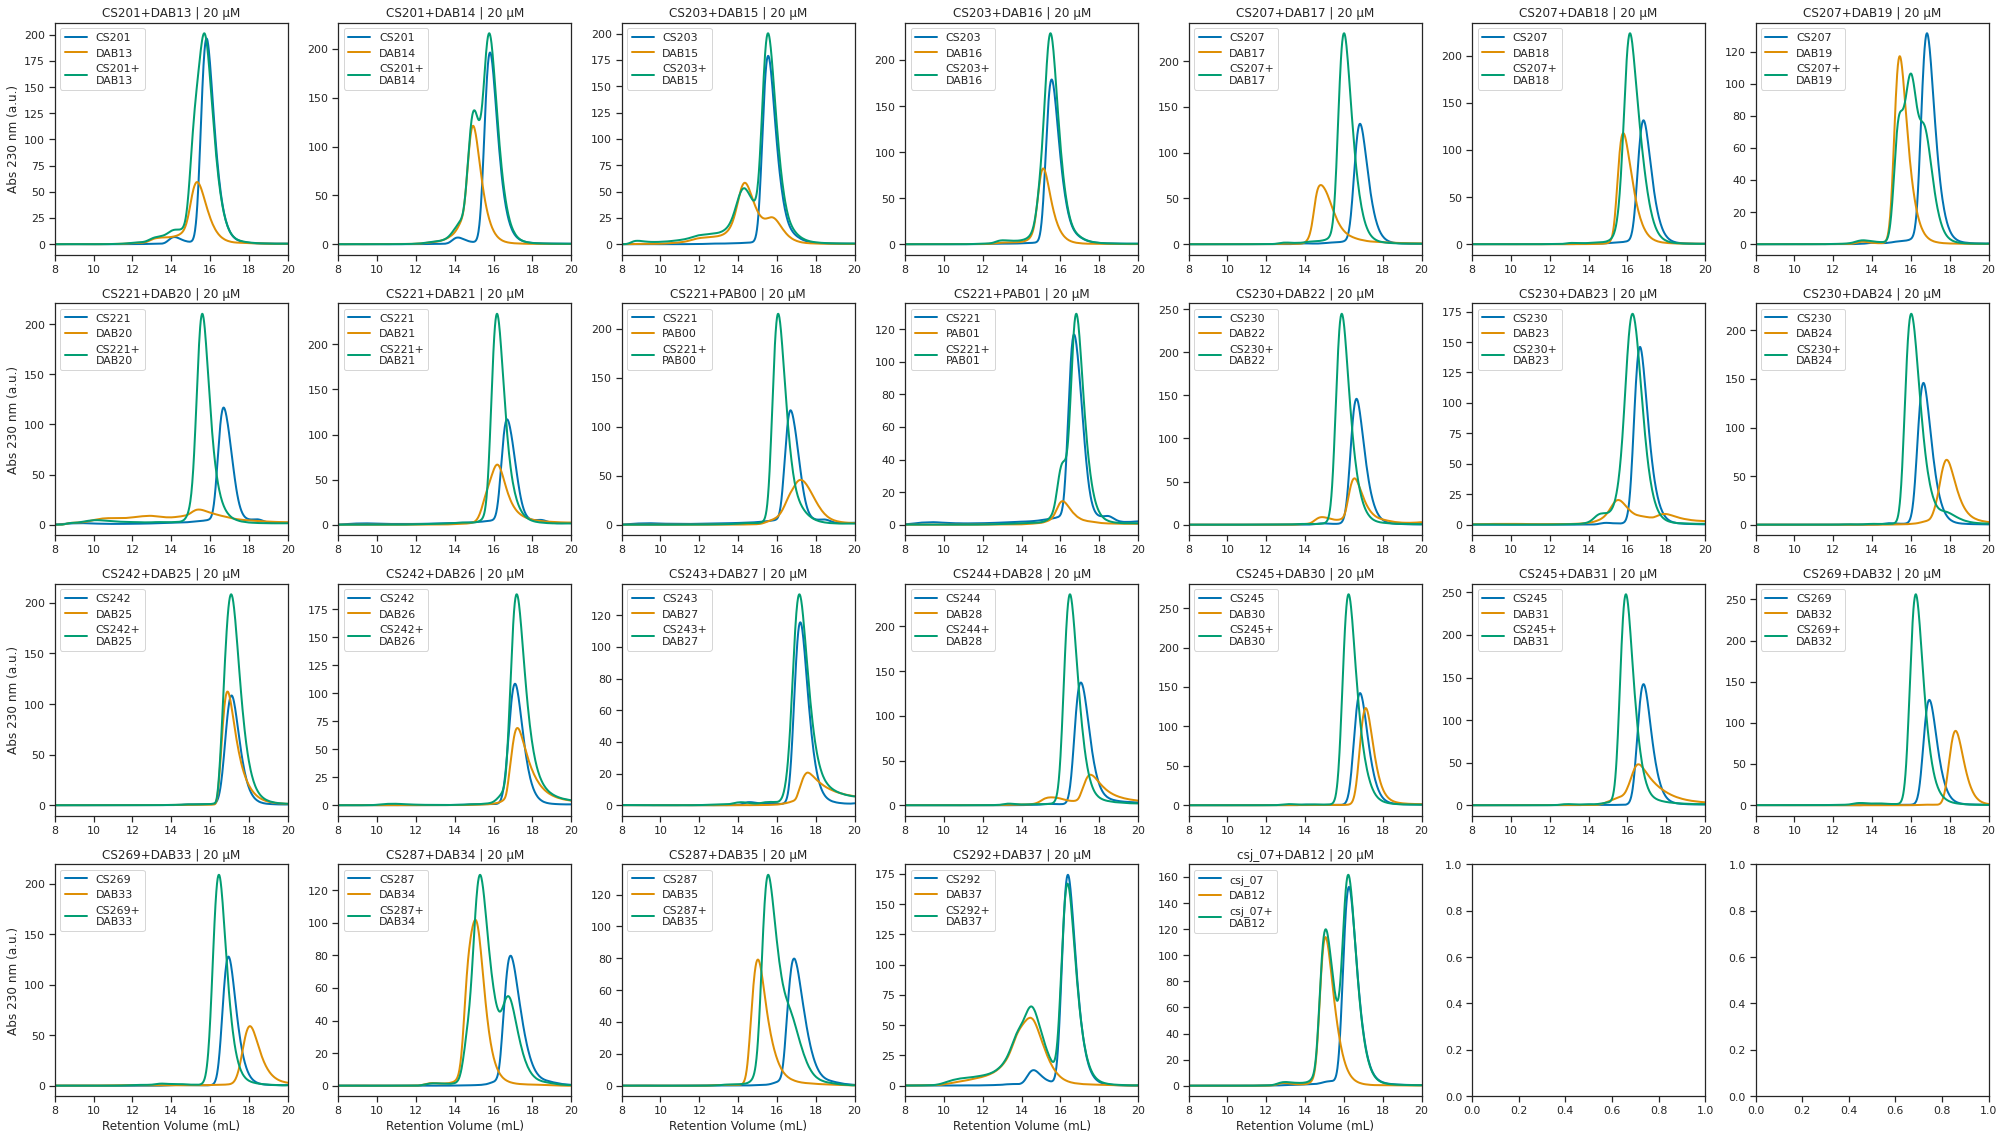

In [24]:
#initialize graph
sns.set(
    context="notebook",
    style="ticks",  # make the background white with black lines
    palette="colorblind",  # a color palette that is colorblind friendly!
)

fig, axs = plt.subplots(4, 7, figsize=(28, 16))

experiment_keys = [k for k in sorted(data.keys()) if '+' in k]

for i, (filename, ax) in enumerate(zip(experiment_keys, axs.flatten())):

    for label in filename.split('+') + [filename]:
        df_plot, uv_label, vol_label = data[label]
        plot_label = label.replace("+", "+\n").replace("cs_", "CS")
        df_plot.plot.line(x=vol_label, y=uv_label, ax=ax, label=plot_label, linewidth=2)

    ax.set_title(f"{filename.replace('cs_', 'CS')} | 20 µM")
    ax.set_xticks(np.arange(8, 22, 2))
    if i >= 21:
        ax.set_xlabel('Retention Volume (mL)')
    else:
        ax.set_xlabel(None)
    if i % 7 == 0:
        ax.set_ylabel('Abs 230 nm (a.u.)')
    else:
        ax.set_ylabel(None)
    ax.legend(loc='upper left')
    ax.set_xlim(8, 20)
    # ax.set_ylim(0, 120)
        
fig.tight_layout()
fig.savefig("dab_binding.png", dpi=300, bbox_inches='tight')

In [15]:
print(experiment_keys)

['cs_201+DAB13', 'cs_201+DAB14', 'cs_203+DAB15', 'cs_203+DAB16', 'cs_207+DAB17', 'cs_207+DAB18', 'cs_207+DAB19', 'cs_221+DAB20', 'cs_221+DAB21', 'cs_221+PAB00', 'cs_221+PAB01', 'cs_230+DAB22', 'cs_230+DAB23', 'cs_230+DAB24', 'cs_242+DAB25', 'cs_242+DAB26', 'cs_243+DAB27', 'cs_244+DAB28', 'cs_245+DAB30', 'cs_245+DAB31', 'cs_269+DAB32', 'cs_269+DAB33', 'cs_287+DAB34', 'cs_287+DAB35', 'cs_292+DAB37', 'csj_07+DAB12']


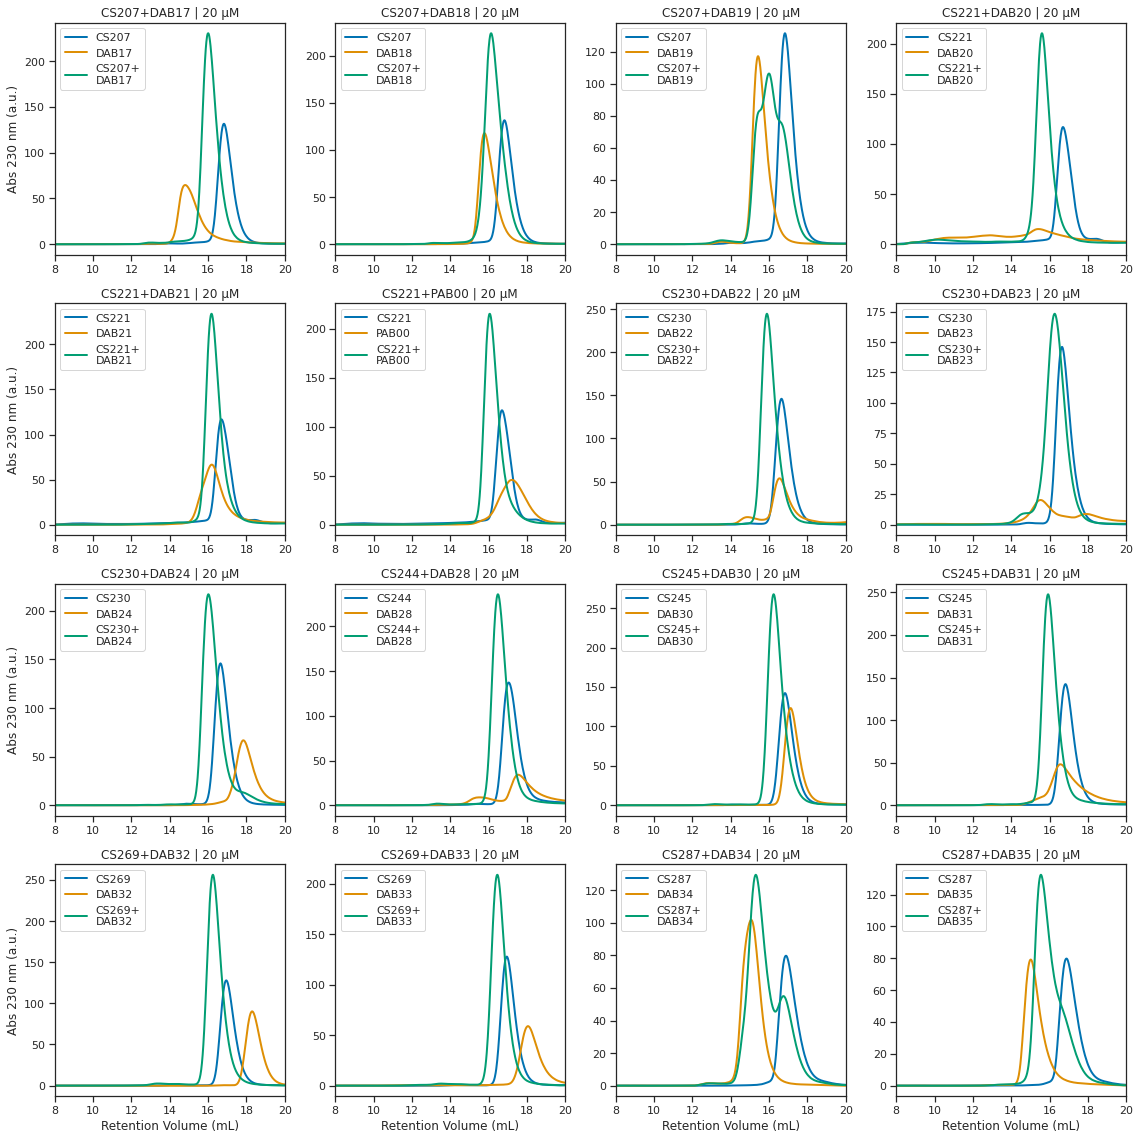

In [23]:
#initialize graph
sns.set(
    context="notebook",
    style="ticks",  # make the background white with black lines
    palette="colorblind",  # a color palette that is colorblind friendly!
)

fig, axs = plt.subplots(4, 4, figsize=(16, 16))

working_keys = ['cs_207+DAB17', 'cs_207+DAB18', 'cs_207+DAB19', 'cs_221+DAB20', 'cs_221+DAB21', 'cs_221+PAB00', 'cs_230+DAB22', 'cs_230+DAB23', 'cs_230+DAB24', 'cs_244+DAB28', 'cs_245+DAB30', 'cs_245+DAB31', 'cs_269+DAB32', 'cs_269+DAB33', 'cs_287+DAB34', 'cs_287+DAB35']

for i, (filename, ax) in enumerate(zip(working_keys, axs.flatten())):

    for label in filename.split('+') + [filename]:
        df_plot, uv_label, vol_label = data[label]
        plot_label = label.replace("+", "+\n").replace("cs_", "CS")
        df_plot.plot.line(x=vol_label, y=uv_label, ax=ax, label=plot_label, linewidth=2)

    ax.set_title(f"{filename.replace('cs_', 'CS')} | 20 µM")
    ax.set_xticks(np.arange(8, 22, 2))
    if i >= 12:
        ax.set_xlabel('Retention Volume (mL)')
    else:
        ax.set_xlabel(None)
    if i % 4 == 0:
        ax.set_ylabel('Abs 230 nm (a.u.)')
    else:
        ax.set_ylabel(None)
    ax.legend(loc='upper left')
    ax.set_xlim(8, 20)
    # ax.set_ylim(0, 120)
        
fig.tight_layout()
fig.savefig("dab_binding_working.png", dpi=300, bbox_inches='tight', transparent=True)

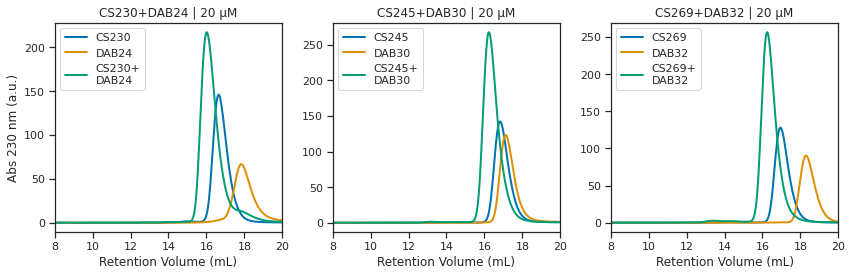

In [8]:
#initialize graph
sns.set(
    context="notebook",
    style="ticks",  # make the background white with black lines
    palette="colorblind",  # a color palette that is colorblind friendly!
)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

comparison_keys = ['cs_230+DAB24', 'cs_245+DAB30', 'cs_269+DAB32']

for i, (filename, ax) in enumerate(zip(comparison_keys, axs.flatten())):

    for label in filename.split('+') + [filename]:
        df_plot, uv_label, vol_label = data[label]
        plot_label = label.replace("+", "+\n").replace("cs_", "CS")
        df_plot.plot.line(x=vol_label, y=uv_label, ax=ax, label=plot_label, linewidth=2)

    ax.set_title(f"{filename.replace('cs_', 'CS')} | 20 µM")
    ax.set_xticks(np.arange(8, 22, 2))
    ax.set_xlabel('Retention Volume (mL)')
    if i == 0:
        ax.set_ylabel('Abs 230 nm (a.u.)')
    else:
        ax.set_ylabel(None)
    ax.legend(loc='upper left')
    ax.set_xlim(8, 20)
    # ax.set_ylim(0, 120)
        
fig.tight_layout()
fig.savefig("dab_binding_comparison.png", dpi=300, bbox_inches='tight', transparent=True)